# Environment: How to render an animation of the board using matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class MazeGame:
    def __init__(self):
        self.board = [
            ['😊', '😺', ' '],
            [' ', ' ', ' '],
            ['😺', ' ', '😍']
        ]
        self.player_pos = (0, 0)  # Starting position
        self.goal_pos = (2, 2)  # Goal position
        self.history = []  # To store the board state at each step
        fig = self.get_maze_board_plot()
        self.history.append(fig)
        plt.close(fig)

    def get_maze_board_plot(self):
      """
      Plots a 3x3 maze grid using matplotlib.

      Args:
        board: A 2D list representing the maze.
                X for player1, O for player 2.
      """
      fig, ax = plt.subplots()
      ax.set_xticks(np.arange(0, 3 + 1, 1))
      ax.set_yticks(np.arange(0, 3 + 1, 1))
      ax.grid(True, color='black')

      for i in range(3):
        for j in range(3):
          ax.text(j+0.5, 2.5 - i, self.board[i][j], ha='center', va='center', fontsize=50, color='blue')


      return fig

    def move(self, direction):
        """
        Moves the player one cell in the specified direction.

        Args:
          direction: A string indicating the direction to move ('up', 'down', 'left', 'right').
        """
        x, y = self.player_pos
        if direction == 'up' and x > 0:
            self.board[x][y] = ' '
            x -= 1
        elif direction == 'down' and x < 2:
            self.board[x][y] = ' '
            x += 1
        elif direction == 'left' and y > 0:
            self.board[x][y] = ' '
            y -= 1
        elif direction == 'right' and y < 2:
            self.board[x][y] = ' '
            y += 1
        else:
            print("Invalid move!")
            return

        self.board[x][y] = '😊'
        self.player_pos = (x, y)


        if self.player_pos == self.goal_pos:
            self.board[x][y] = '😊😍'
            print("You reached the goal!")

        fig = self.get_maze_board_plot()
        self.history.append(fig)
        plt.close(fig)

In [ ]:
# Create a game instance
game = MazeGame()

# Example gameplay
game.move('down')
game.move('right')
game.move('down')
game.move('right')

plt.show()

You reached the goal!


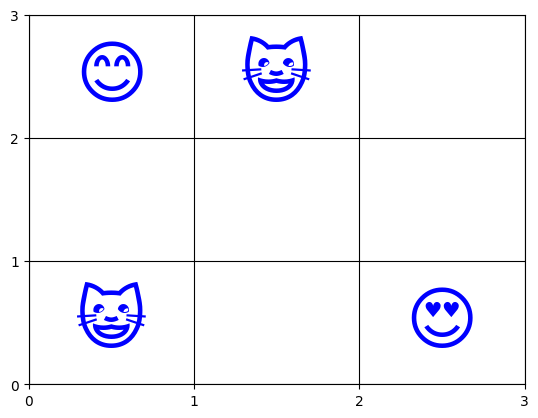

In [ ]:
from IPython.display import display  # Import display functions
display(game.history[0])  # Display the first figure

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.image as mpimg
from io import BytesIO

# Function to convert a figure to an image array
def fig_to_image(fig):
    buf = BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img = mpimg.imread(buf)
    buf.close()
    return img

# Convert figures to images
images = [fig_to_image(fig) for fig in game.history]

# Create an empty figure for the animation
fig, ax = plt.subplots()
img_plot = ax.imshow(images[0])  # Initial plot
plt.close(fig)

# Update function for the animation
def update(frame):
    img_plot.set_data(images[frame])
    return [img_plot]

# Create animation
ani = FuncAnimation(fig, update, frames=len(images), interval=1000, blit=True)

# Display animation
ani

In [ ]:
# prompt: Create a class for an Agent that can play the maze

import random

class Agent:
    def __init__(self):
        pass

    def choose_action(self, possible_actions):
        """
        Chooses an action randomly from the list of possible actions.

        Args:
          possible_actions: A list of strings representing possible actions ('up', 'down', 'left', 'right').

        Returns:
          A string representing the chosen action.
        """
        return random.choice(possible_actions)




In [ ]:
# prompt: Use the agent class to play ten moves

agent = Agent()
for _ in range(10):
  possible_actions = ['up', 'down', 'left', 'right']
  action = agent.choose_action(possible_actions)
  game.move(action)


Invalid move!
You reached the goal!
Invalid move!
Invalid move!


In [ ]:
game.history

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]